In [207]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [208]:
from environment.model_apps import apps
from environment.model_infra import Infra
from environment.constants import *

N_APPS = len(apps)
N_INFRA = Infra().getInfraSize()

obs_size = OBSERVATION_SPACE_SIZE
action_size = N_INFRA

In [209]:
data = {}
data["obs"] = [[] for _ in range(N_APPS)]
data["actions"] = [[] for _ in range(N_APPS)]
data["rewards"] = []
data["appLoad"] = [[] for _ in range(N_INFRA)]
data["energy"] = []
with open("data/results.csv", "r") as f:
    for l in f:
        l = l.strip().split(",")
        l = list(map(float, l))
        for app in range(N_APPS):
            data["obs"][app].append(l[obs_size*app:obs_size*(app+1)])
        for app in range(N_APPS):
            data["actions"][app].append(l[obs_size*N_APPS + action_size*app:obs_size*N_APPS + action_size*(app+1)])
        k = obs_size*N_APPS + action_size*N_APPS
        for pm in range(N_INFRA):
            data["appLoad"][pm].append(l[k + pm * N_APPS:k + (pm+1) * N_APPS])
        k += N_INFRA * N_APPS
        data["energy"].append(l[k])
        
        data["rewards"].append(l[len(l)-N_APPS:len(l)])

data["obs"] = np.array(data["obs"])
data["actions"] = np.array(data["actions"])
data["rewards"] = np.array(data["rewards"])
data["appLoad"] = np.array(data["appLoad"])
data["energy"] = np.array(data["energy"])
        

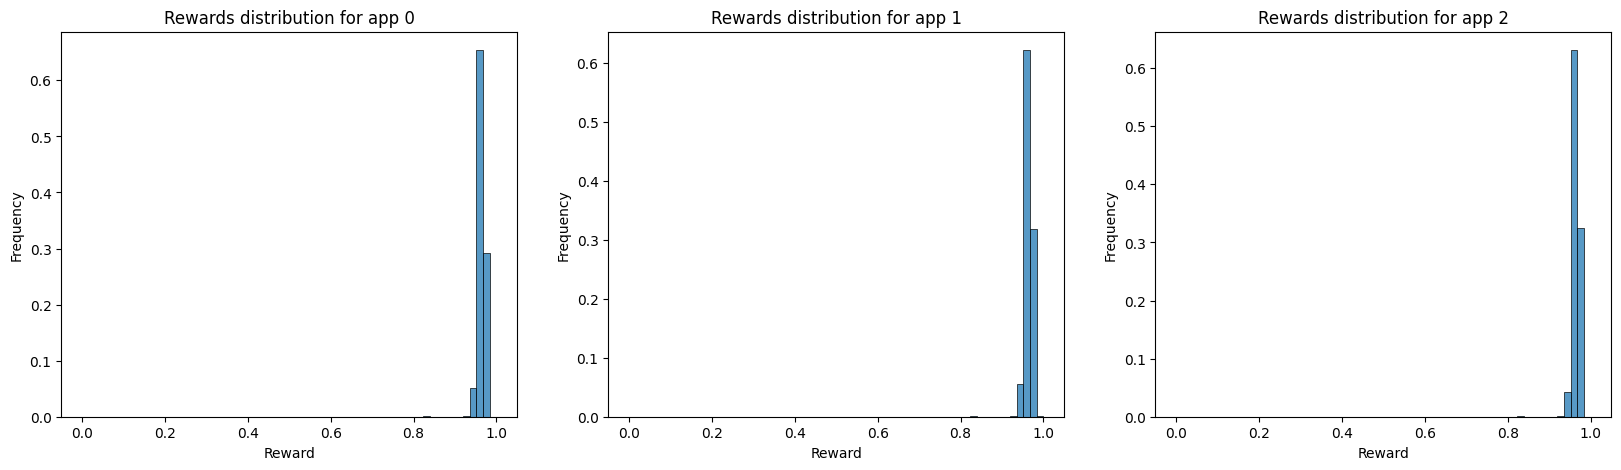

In [210]:
bin_edges = np.linspace(0, 1, 63)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Adjust figsize as needed

# rewards
for app in range(N_APPS):
    # plt.plot(data["rewards"][:1000,app], label=str(app))
    sns.histplot(data["rewards"][:1000,app], bins=bin_edges,ax=axes[app], stat="probability")
    axes[app].set_title(f"Rewards distribution for app {app}")
    axes[app].set_ylabel("Frequency")
    axes[app].set_xlabel("Reward")




Average energy consumption: 9.170294400000001 J


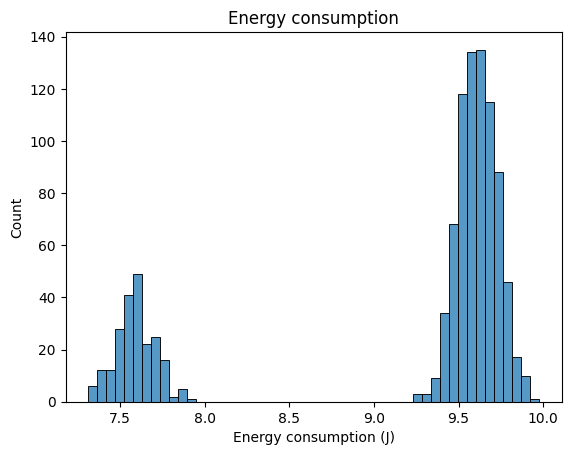

In [211]:
# rewards

plt.figure()
sns.histplot(data["energy"],stat="count", bins=50)
plt.title("Energy consumption")
plt.xlabel("Energy consumption (J)")
plt.ylabel("Count")

print(f"Average energy consumption: {np.mean(data['energy'])} J")

plt.show()

Text(0.5, 1.0, 'Requests')

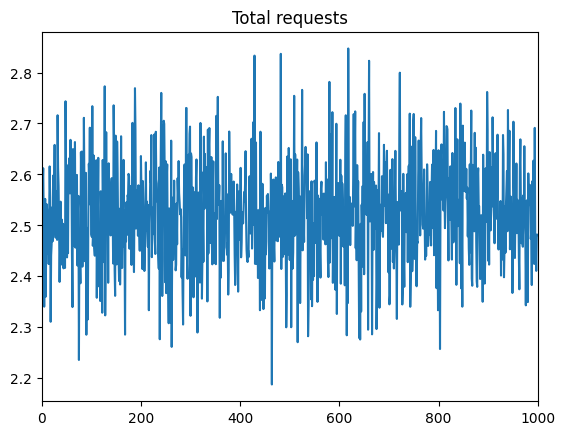

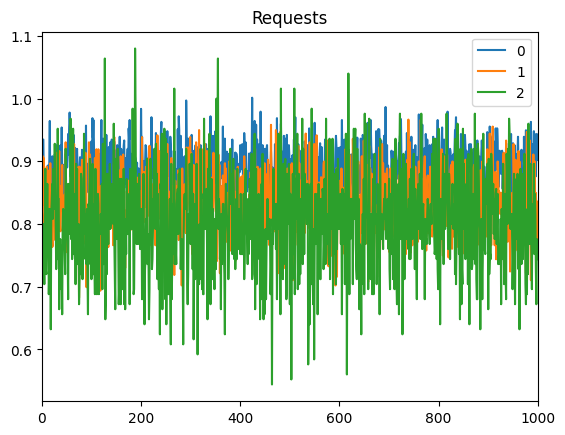

In [212]:


# requests

plt.figure()
plt.plot(np.sum(data["obs"][:,:1000,-1], axis=0))
plt.xlim(0, 1000)
plt.title("Total requests")

plt.figure()
for app in range(N_APPS):
    plt.plot(data["obs"][app,:1000,-1], label=str(app))
plt.legend()
plt.xlim(0, 1000)
plt.title("Requests")



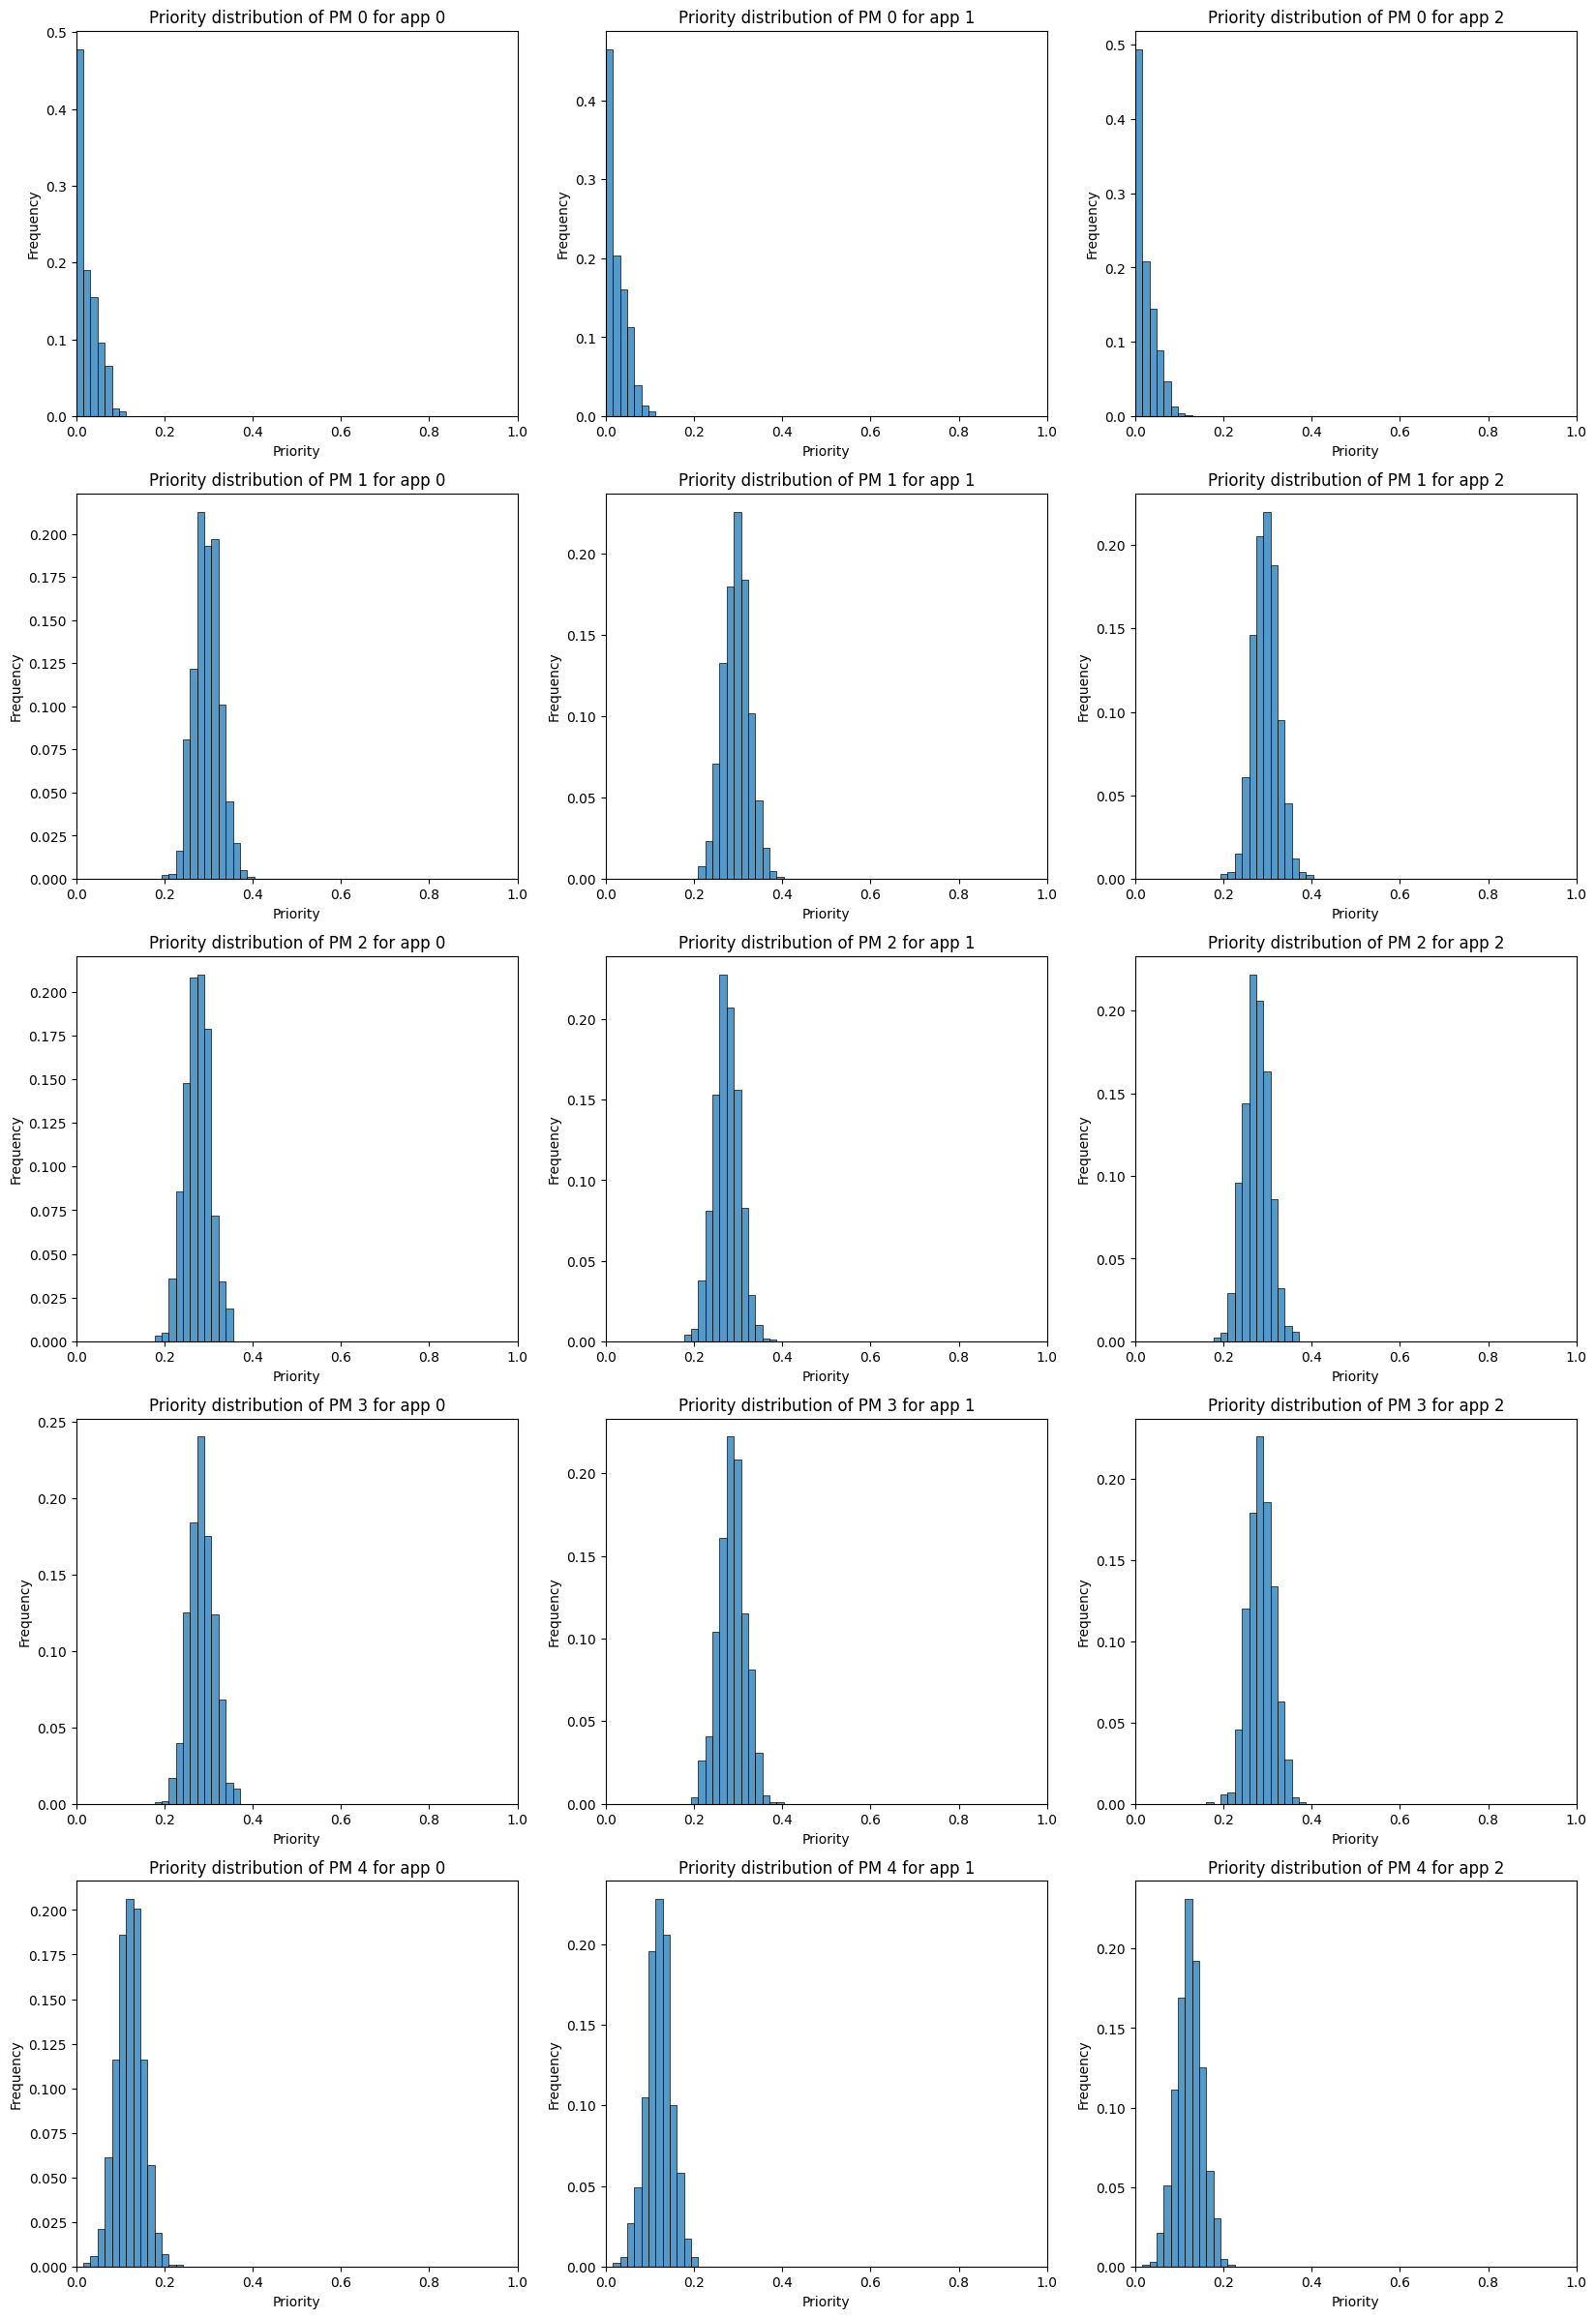

In [213]:

# actions

# Define the bin edges to span from 0 to 1 with regular intervals

# Create the subplots grid
fig, axes = plt.subplots(5, 3, figsize=(20, 6 * N_INFRA))  # Adjust figsize as needed

for app in range(N_APPS):
    for i in range(N_INFRA):
        ax = axes[i][app]
        sns.histplot(data["actions"][app, :1000, i], bins=bin_edges, ax=ax, stat="probability")
        
        ax.set_xlim(0, 1)
        ax.set_title(f"Priority distribution of PM {i} for app {app}")
        ax.set_ylabel("Frequency")
        ax.set_xlabel("Priority")
        #ax.set_ylim(0, 1)  # Optional, depending on your data


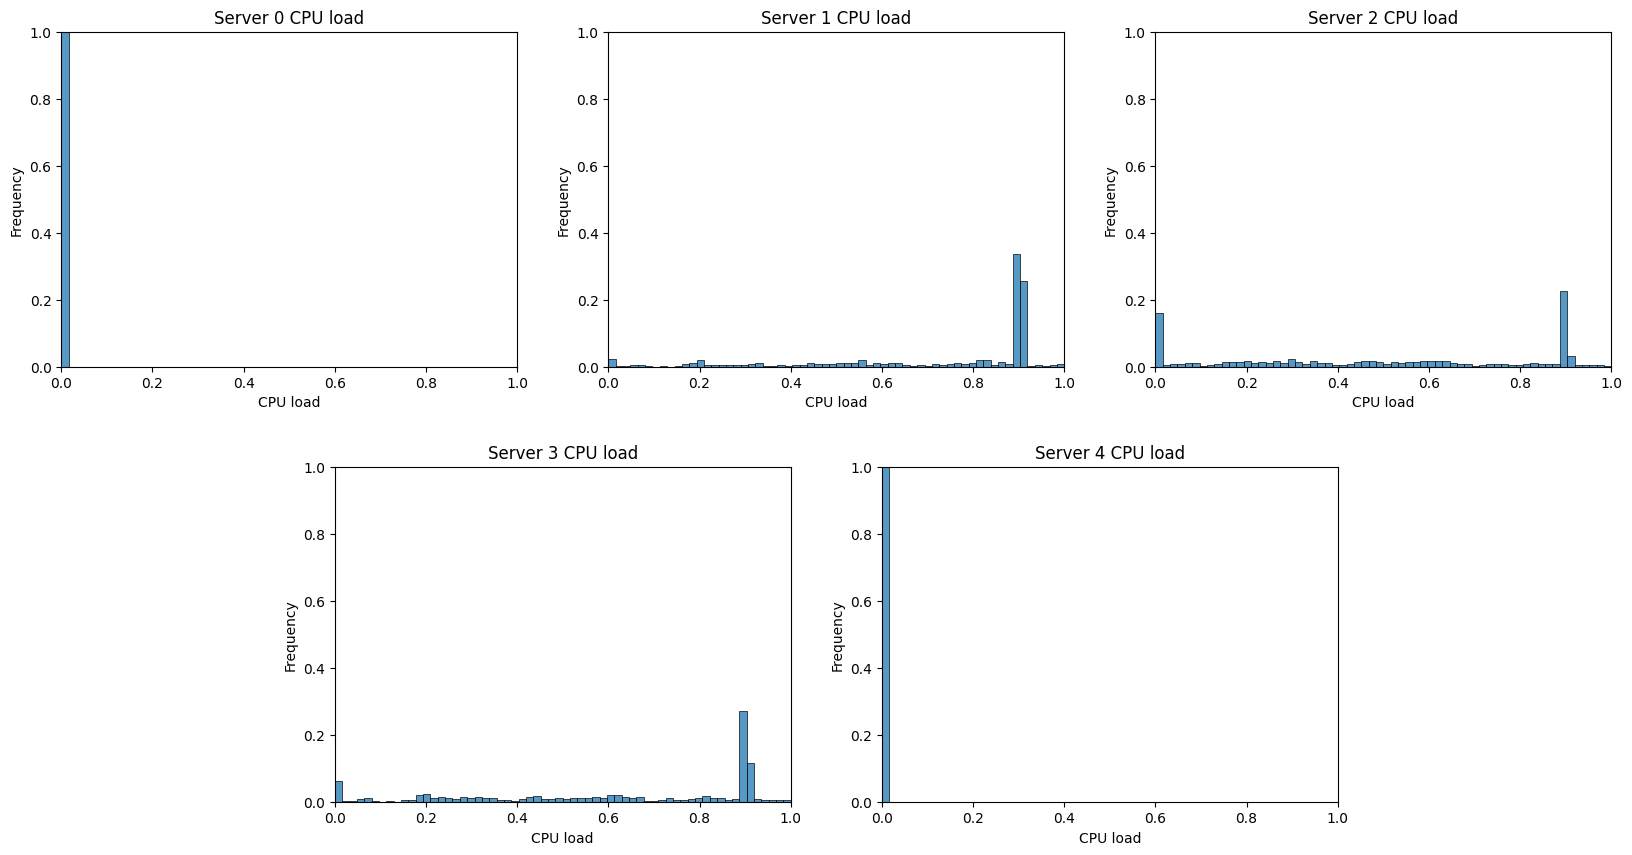

In [214]:

axes = []
plt.figure(figsize=(20, 10))
axes.append(plt.subplot2grid((2,6), (0,0), colspan=2))
axes.append(plt.subplot2grid((2,6), (0,2), colspan=2))
axes.append(plt.subplot2grid((2,6), (0,4), colspan=2))
axes.append(plt.subplot2grid((2,6), (1,1), colspan=2))
axes.append(plt.subplot2grid((2,6), (1,3), colspan=2))
plt.subplots_adjust(hspace=.3, wspace=.5)

for s in range(N_INFRA):
    sns.histplot(data["obs"][0,:1000,s], bins=bin_edges, stat="probability", ax=axes[s])

    axes[s].set_title(f"Server {s} CPU load")
    axes[s].set_ylabel("Frequency")
    axes[s].set_xlabel("CPU load")
    axes[s].set_ylim(0, 1)
    axes[s].set_xlim(0, 1)



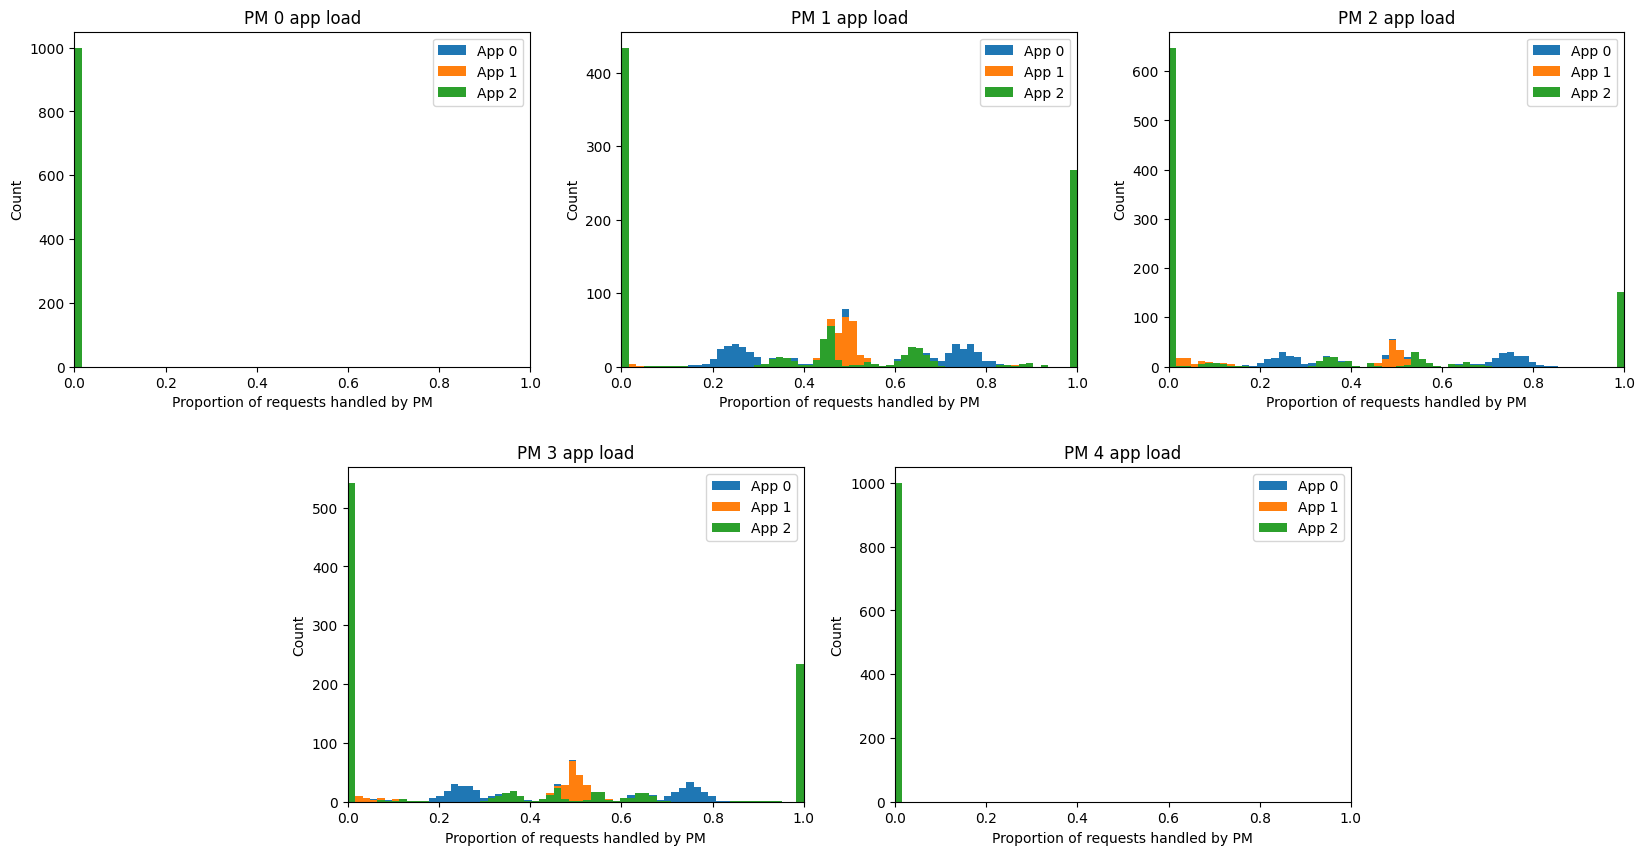

In [215]:

axes = []
plt.figure(figsize=(20, 10))
axes.append(plt.subplot2grid((2,6), (0,0), colspan=2))
axes.append(plt.subplot2grid((2,6), (0,2), colspan=2))
axes.append(plt.subplot2grid((2,6), (0,4), colspan=2))
axes.append(plt.subplot2grid((2,6), (1,1), colspan=2))
axes.append(plt.subplot2grid((2,6), (1,3), colspan=2))
plt.subplots_adjust(hspace=.3, wspace=.5)

total_load = np.sum(data["appLoad"][:,:1000,:], axis=0)

for s in range(N_INFRA):
    for app in range(N_APPS):
        """
        sns.histplot(data["appLoad"][s,:1000,app]/total_load[:1000,app], 
                     bins=bin_edges, 
                     stat="count", 
                     ax=axes[s], 
                     multiple="stack", 
                     label=f"App {app}", 
                     element="bars",
                     kde=False)"""
        axes[s].hist(data["appLoad"][s,:1000,app]/total_load[:1000,app],
                        bins=bin_edges,
                        alpha=1,
                        label=f"App {app}",
                        stacked=True)
                     
    
    axes[s].legend()
    axes[s].set_title(f"PM {s} app load")
    axes[s].set_ylabel("Count")
    axes[s].set_xlabel("Proportion of requests handled by PM")
    # axes[s].set_ylim(0, 1)
    axes[s].set_xlim(0, 1)



plt.show()

